In [1]:
import os
import numpy as np
import pathlib
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

In [2]:
# open the data file
df = pd.read_csv("Model Fitting1.csv")
df.head()

,RH,UPV,SandT,CementT,CompStr
0,28,4.03,1,1,33.1
1,28,4.01,1,1,33.2
2,32,4.01,1,1,34.1
3,30,4.12,1,1,35.6
4,32,4.11,1,1,35.4


In [3]:
# check the shape of the data
df.shape

(250, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RH       250 non-null    int64  
 1   UPV      250 non-null    float64
 2   SandT    250 non-null    int64  
 3   CementT  250 non-null    int64  
 4   CompStr  250 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.9 KB


In [5]:
df.describe()

,RH,UPV,SandT,CementT,CompStr
count,250.000000,250.00000,250.000000,250.000000,250.000000
mean,29.416000,4.04768,1.800000,1.600000,31.838800
std,2.287328,0.07825,0.749833,0.490881,2.744321
min,24.000000,3.90000,1.000000,1.000000,26.600000
25%,28.000000,4.00000,1.000000,1.000000,29.200000
50%,30.000000,4.05000,2.000000,2.000000,32.350000
75%,32.000000,4.11000,2.000000,2.000000,34.300000
max,34.000000,4.26000,3.000000,2.000000,36.700000


In [6]:
# check the null values
df.isnull().sum()

RH         0
UPV        0
SandT      0
CementT    0
CompStr    0
dtype: int64

# Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

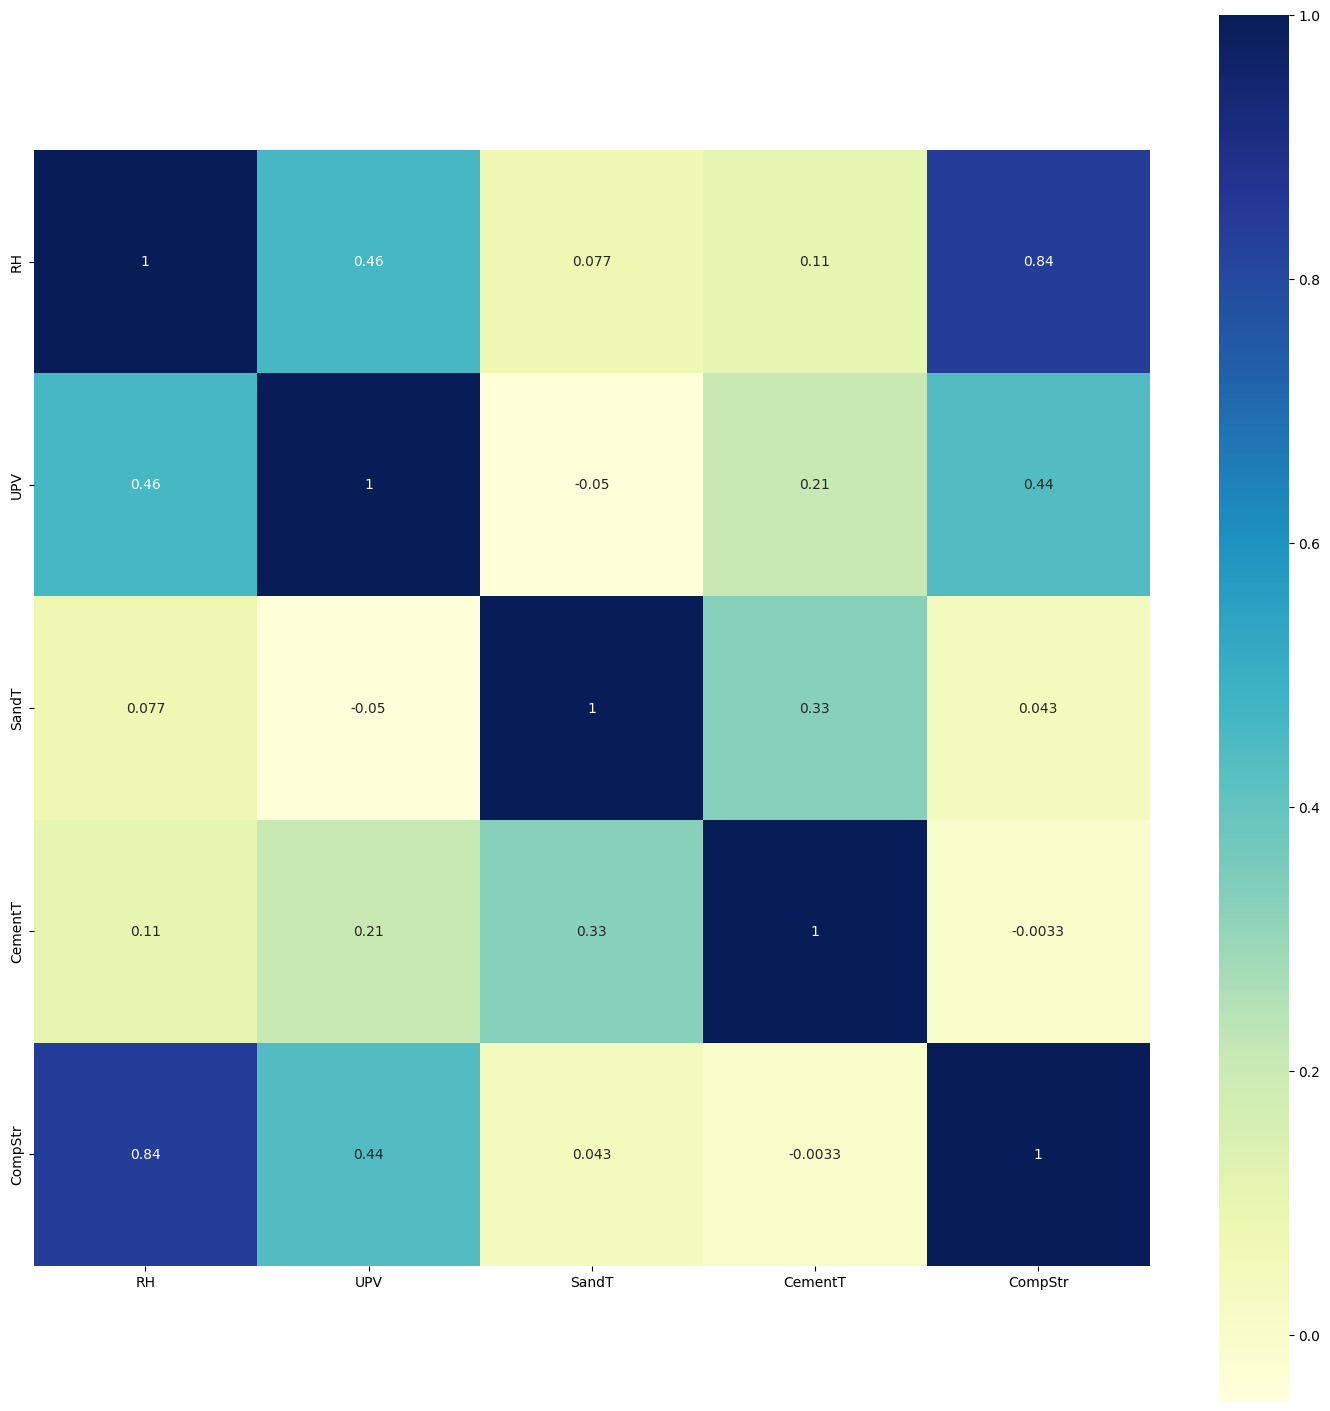

In [9]:
# Correlation amongst numeric attributes
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= 'YlGnBu',annot=True, square=True)

# Train Model

In [12]:
Y = df['CompStr']
X = df.drop(['CompStr'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape {} ".format(X_train.shape))
print("X_test shape {} ".format(X_test.shape))

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape (200, 4) 
X_test shape (50, 4) 


## Linear Regression

In [32]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create linear regression model
model = LinearRegression()

# Define the parameter grid for Grid Search
hyperparameters = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1,2,3,4]
}

# Create grid search object
clf = GridSearchCV(model,
                   param_grid=hyperparameters,
                   scoring='neg_mean_squared_error',
                   cv=5)

# Fit grid search to data
clf.fit(X_train, y_train)

# Get best hyperparameters
best_params = clf.best_params_

# Train linear regression model with best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

print("Tuned Hyperparameters:", best_params)


Tuned Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


In [33]:
## Check the overfitting

# To evaluate the model's performance and check for overfitting, predictions are made on the test data, 
# and the mean squared error (MSE) is calculated. The MSE provides an estimate of how well the model generalizes 
# to unseen data. If the MSE on the test data is significantly higher than the MSE on the training data, it may indicate overfitting.

# Make predictions on test data
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of test data:", mse_test)

# Make predictions on train data
y_pred_train = best_model.predict(X_train)

# Calculate mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error of train data:", mse_train)

Mean Squared Error of test data: 2.0652602880031
Mean Squared Error of train data: 2.2714642304580037


Mean Squared Logarithmic Error (MSLE):  0.0019299444827033468


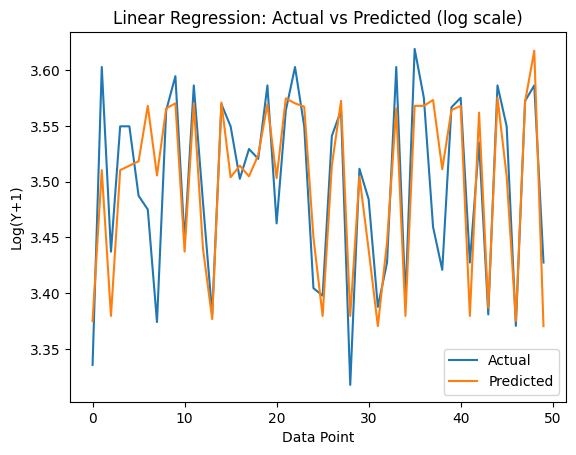

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

# assuming you have already trained and evaluated your regression ANN model
# and have obtained the predicted y values (y_pred) for X_test

# calculate MSLE
y_pred = best_model.predict(X_test)
msle = mean_squared_log_error(y_test,y_pred)

# print MSLE
print("Mean Squared Logarithmic Error (MSLE): ", msle)

# plot MSLE
plt.plot(np.arange(len(y_test)), np.log(y_test+1), label='Actual')
plt.plot(np.arange(len(y_pred)), np.log(y_pred+1), label='Predicted')
plt.legend()
plt.xlabel('Data Point')
plt.ylabel('Log(Y+1)')
plt.title('Linear Regression: Actual vs Predicted (log scale)')
plt.show()

[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

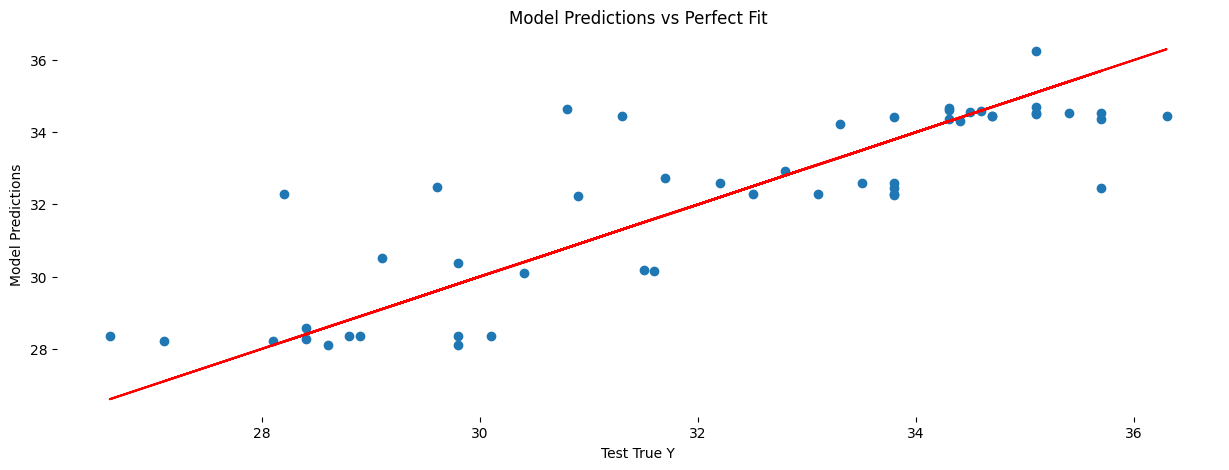

In [35]:
predictions = best_model.predict(X_test)

f, axes = plt.subplots(1, 1,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

sns.despine(left=True, bottom=True)
axes.set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')